In [ ]:
'''This file contains the code and results for the multiclass classification movie revenue prediction problem'''

# Pull in raw dataset to coding environment utilizing pandas to read the csv, provide a dataframe structure and add correspoding attribute labels:

import pandas as pd
from pandas.core.ops.array_ops import isna
import os

# Raw dataset is stored in Google Drive. Mounted google drive to access original IMDB dataset:
movies = pd.read_csv('/content/drive/MyDrive/820/21Jan2023- 820- Movie metadata.csv')
movies = pd.DataFrame(data = movies)

col_names = ["Color", "Director Name", "# Critic Reviews", "Duration", "# Director Likes", "# Actor 3 Likes", "Actor 2 Name", "# Actor 1 Likes", "Gross", "Genres", 
             "Actor 1 Name", "Movie Title", "# Users Voted", "# Cast Likes", "Actor 3 Name", "# FB Poster", "Plot Keywords", "Movie Link", "# Users for Reviews", "Language", "Country",
             "Content Rating", "Budget", "Title Year", "# Actor 2 Likes", "IMDB Score", "Aspect Ratio", "# Movie Likes"]
movies.columns = col_names


In [ ]:
movies.head()

,Color,Director Name,# Critic Reviews,Duration,# Director Likes,# Actor 3 Likes,Actor 2 Name,# Actor 1 Likes,Gross,Genres,...,# Users for Reviews,Language,Country,Content Rating,Budget,Title Year,# Actor 2 Likes,IMDB Score,Aspect Ratio,# Movie Likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
# Display raw data information prior to removing missing data:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Color                5024 non-null   object 
 1   Director Name        4939 non-null   object 
 2   # Critic Reviews     4993 non-null   float64
 3   Duration             5028 non-null   float64
 4   # Director Likes     4939 non-null   float64
 5   # Actor 3 Likes      5020 non-null   float64
 6   Actor 2 Name         5030 non-null   object 
 7   # Actor 1 Likes      5036 non-null   float64
 8   Gross                4159 non-null   float64
 9   Genres               5043 non-null   object 
 10  Actor 1 Name         5036 non-null   object 
 11  Movie Title          5043 non-null   object 
 12  # Users Voted        5043 non-null   int64  
 13  # Cast Likes         5043 non-null   int64  
 14  Actor 3 Name         5020 non-null   object 
 15  # FB Poster          5030 non-null   f

In [ ]:
# Remove all movies that contain missing data and display information about new dataset:
movies = movies.dropna()
pd.set_option('float_format', '{:.2f}'.format)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Color                3756 non-null   object 
 1   Director Name        3756 non-null   object 
 2   # Critic Reviews     3756 non-null   float64
 3   Duration             3756 non-null   float64
 4   # Director Likes     3756 non-null   float64
 5   # Actor 3 Likes      3756 non-null   float64
 6   Actor 2 Name         3756 non-null   object 
 7   # Actor 1 Likes      3756 non-null   float64
 8   Gross                3756 non-null   float64
 9   Genres               3756 non-null   object 
 10  Actor 1 Name         3756 non-null   object 
 11  Movie Title          3756 non-null   object 
 12  # Users Voted        3756 non-null   int64  
 13  # Cast Likes         3756 non-null   int64  
 14  Actor 3 Name         3756 non-null   object 
 15  # FB Poster          3756 non-null   f

In [ ]:
# Count number of movies that were released after 1980:

post = [len(movies[movies['Title Year'] > 1980])]
pre = [len(movies[movies['Title Year'] <= 1980])]

# Initialize visual:
compare = pd.DataFrame(columns = ['Post 1980', 'Pre 1980'])
compare

compare['Post 1980'] = post
compare['Pre 1980'] = pre

compare

,Post 1980,Pre 1980
0,3649,107


In [ ]:
# Display table of feature relationships:

correlation = movies.corr()
correlation


,# Critic Reviews,Duration,# Director Likes,# Actor 3 Likes,# Actor 1 Likes,Gross,# Users Voted,# Cast Likes,# FB Poster,# Users for Reviews,Budget,Title Year,# Actor 2 Likes,IMDB Score,Aspect Ratio,# Movie Likes
# Critic Reviews,1.00,0.23,0.18,0.25,0.17,0.46,0.59,0.24,-0.03,0.56,0.10,0.42,0.25,0.35,0.18,0.71
Duration,0.23,1.00,0.18,0.13,0.08,0.25,0.34,0.12,0.03,0.35,0.07,-0.13,0.13,0.37,0.15,0.22
# Director Likes,0.18,0.18,1.00,0.12,0.09,0.14,0.30,0.12,-0.05,0.22,0.02,-0.04,0.12,0.19,0.04,0.16
# Actor 3 Likes,0.25,0.13,0.12,1.00,0.25,0.30,0.27,0.49,0.11,0.21,0.04,0.12,0.55,0.07,0.05,0.27
# Actor 1 Likes,0.17,0.08,0.09,0.25,1.00,0.14,0.18,0.94,0.06,0.12,0.02,0.10,0.39,0.09,0.06,0.13
Gross,0.46,0.25,0.14,0.30,0.14,1.00,0.62,0.24,-0.03,0.54,0.10,0.05,0.25,0.21,0.06,0.37
# Users Voted,0.59,0.34,0.30,0.27,0.18,0.62,1.00,0.25,-0.03,0.78,0.07,0.02,0.24,0.48,0.08,0.52
# Cast Likes,0.24,0.12,0.12,0.49,0.94,0.24,0.25,1.00,0.08,0.18,0.03,0.13,0.64,0.11,0.07,0.21
# FB Poster,-0.03,0.03,-0.05,0.11,0.06,-0.03,-0.03,0.08,1.00,-0.08,-0.02,0.07,0.07,-0.07,0.02,0.02
# Users for Reviews,0.56,0.35,0.22,0.21,0.12,0.54,0.78,0.18,-0.08,1.00,0.07,0.02,0.19,0.33,0.10,0.37


<Axes: >

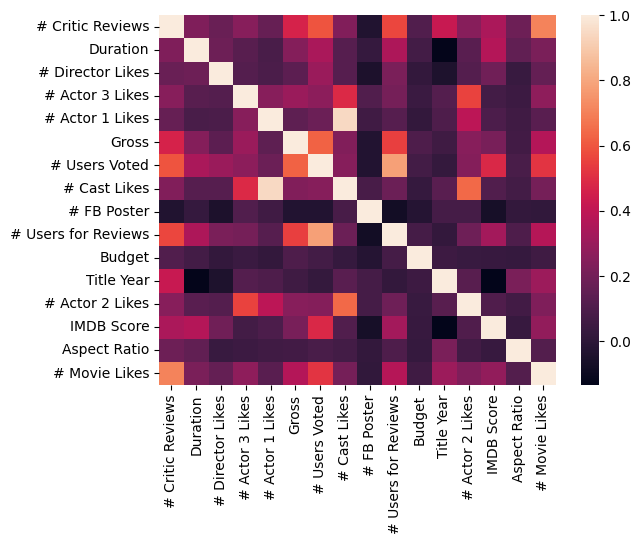

In [ ]:
# Display correlation of variables:
import seaborn as sb

correlation = movies.corr()
sb.heatmap(correlation)

In [ ]:
# Display statistical measures for each numerical attribute on the cleaned dataset:
movies.describe()

,# Critic Reviews,Duration,# Director Likes,# Actor 3 Likes,# Actor 1 Likes,Gross,# Users Voted,# Cast Likes,# FB Poster,# Users for Reviews,Budget,Title Year,# Actor 2 Likes,IMDB Score,Aspect Ratio,# Movie Likes
count,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00
mean,167.38,110.26,807.34,771.28,7751.34,52612824.24,105826.73,11527.10,1.38,336.84,46236849.64,2002.98,2021.78,6.47,2.11,9353.83
std,123.45,22.65,3068.17,1894.25,15519.34,70317866.91,152035.40,19122.18,2.04,411.23,226010288.48,9.89,4544.91,1.06,0.35,21462.89
min,2.00,37.00,0.00,0.00,0.00,162.00,91.00,0.00,0.00,4.00,218.00,1927.00,0.00,1.60,1.18,0.00
25%,77.00,96.00,11.00,194.00,745.00,8270232.75,19667.00,1919.75,0.00,110.00,10000000.00,1999.00,384.75,5.90,1.85,0.00
50%,138.50,106.00,64.00,436.00,1000.00,30093107.00,53973.50,4059.50,1.00,210.00,25000000.00,2004.00,685.50,6.60,2.35,227.00
75%,224.00,120.00,235.00,691.00,13000.00,66881940.75,128602.00,16240.00,2.00,398.25,50000000.00,2010.00,976.00,7.20,2.35,11000.00
max,813.00,330.00,23000.00,23000.00,640000.00,760505847.00,1689764.00,656730.00,43.00,5060.00,12215500000.00,2016.00,137000.00,9.30,16.00,349000.00


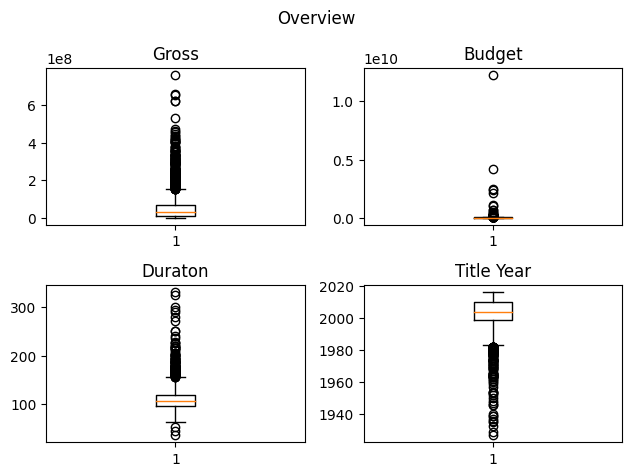

In [ ]:
# Initialize plots to visualize numerical features:

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows = 2, ncols = 2)
fig.suptitle('Overview')

# create movie 'Overview Subplots' for each feature of interest
gross = movies['Gross']
budget = movies['Budget']
duration = movies['Duration']
year = movies['Title Year']

#create plots:
axs[0, 0].boxplot(gross)
axs[0, 1].boxplot(budget)
axs[1, 0].boxplot(duration)
axs[1, 1].boxplot(year)

#set title to each subplot:
axs[0, 0].set_title("Gross")
axs[0, 1].set_title("Budget")
axs[1, 0].set_title("Duraton")
axs[1, 1].set_title("Title Year")

# adjust layout
fig.tight_layout(pad = 1.0)

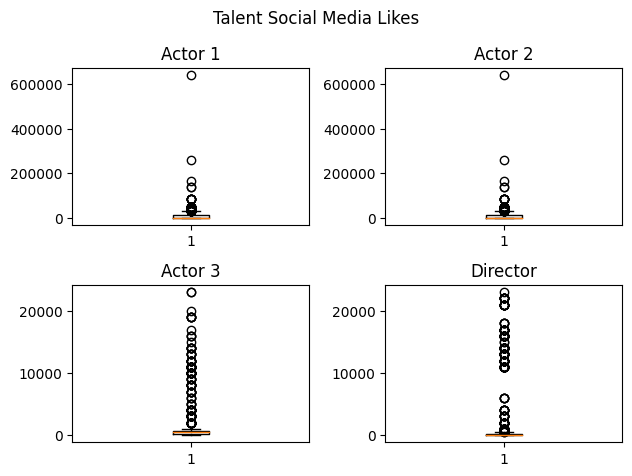

In [ ]:
# Cast Social Media:
act1_Likes = movies['# Actor 1 Likes']
act2_Likes = movies['# Actor 1 Likes']
act3_Likes = movies['# Actor 3 Likes']
dir_Likes = movies['# Director Likes']

fig, axs = plt.subplots(nrows = 2, ncols = 2)
fig.suptitle('Talent Social Media Likes')

#create plots:
axs[0, 0].boxplot(act1_Likes)
axs[0, 1].boxplot(act2_Likes)
axs[1, 0].boxplot(act3_Likes)
axs[1, 1].boxplot(dir_Likes)

#set title to each subplot:
axs[0, 0].set_title("Actor 1")
axs[0, 1].set_title("Actor 2")
axs[1, 0].set_title("Actor 3")
axs[1, 1].set_title("Director")

fig.tight_layout(pad = 1.0)


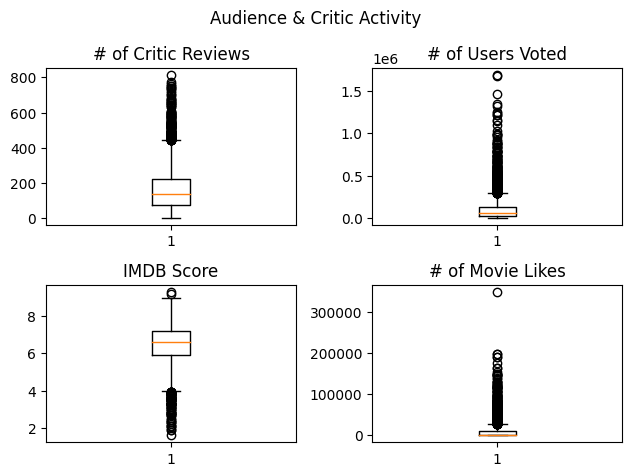

In [ ]:
# Voting of Users and Critics:
critic_Votes = movies['# Critic Reviews']
user_Votes = movies['# Users Voted']
IMDB = movies['IMDB Score']
mov_Likes = movies['# Movie Likes']

fig, axs = plt.subplots(nrows = 2, ncols = 2)
fig.suptitle('Audience & Critic Activity')

#create plots:
axs[0, 0].boxplot(critic_Votes)
axs[0, 1].boxplot(user_Votes)
axs[1, 0].boxplot(IMDB)
axs[1, 1].boxplot(mov_Likes)

#set title to each subplot:
axs[0, 0].set_title("# of Critic Reviews")
axs[0, 1].set_title("# of Users Voted")
axs[1, 0].set_title("IMDB Score")
axs[1, 1].set_title("# of Movie Likes")

fig.tight_layout(pad = 1.0)

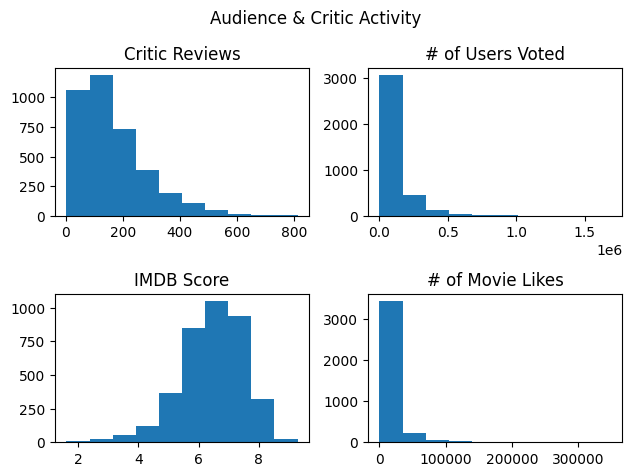

In [ ]:
# Histogram Subplots:

hcritics = movies['# Critic Reviews']
husers_Voted = movies['# Users Voted']
hIMDB = movies['IMDB Score']
hmov_Likes = movies['# Movie Likes']

fig, axs = plt.subplots(nrows = 2, ncols = 2)
fig.suptitle('Audience & Critic Activity')

#create plots:
axs[0, 0].hist(hcritics)
axs[0, 1].hist(husers_Voted)
axs[1, 0].hist(hIMDB)
axs[1, 1].hist(hmov_Likes)

#set title to each subplot:
axs[0, 0].set_title("Critic Reviews")
axs[0, 1].set_title("# of Users Voted")
axs[1, 0].set_title("IMDB Score")
axs[1, 1].set_title("# of Movie Likes")

fig.tight_layout(pad = 1.0)


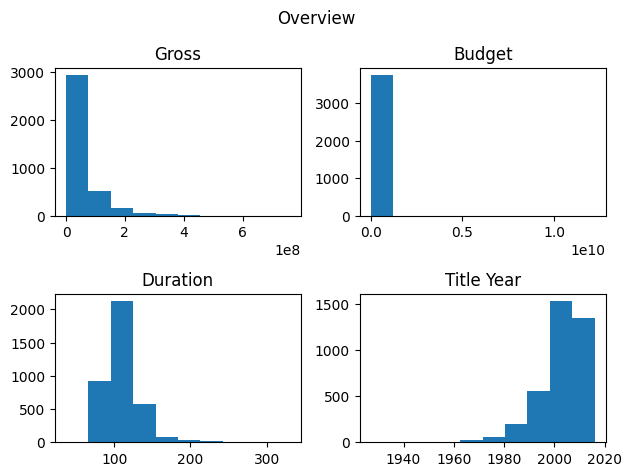

In [ ]:
# Histogram Subplots 2:

hgross = movies['Gross']
hbudget = movies['Budget']
hduration = movies['Duration']
hYear = movies['Title Year']

fig, axs = plt.subplots(nrows = 2, ncols = 2)
fig.suptitle('Overview')

#create plots:
axs[0, 0].hist(hgross)
axs[0, 1].hist(hbudget)
axs[1, 0].hist(hduration)
axs[1, 1].hist(hYear)

#set title to each subplot:
axs[0, 0].set_title("Gross")
axs[0, 1].set_title("Budget")
axs[1, 0].set_title("Duration")
axs[1, 1].set_title("Title Year")

fig.tight_layout(pad = 1.0)


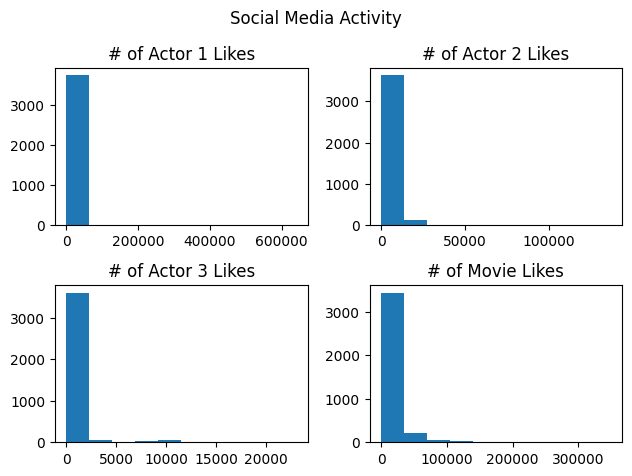

In [ ]:
hact1_Likes = movies['# Actor 1 Likes']
hact2_Likes = movies['# Actor 2 Likes']
hact3_Likes = movies['# Actor 3 Likes']
hmov_Likes = movies['# Movie Likes']

fig, axs = plt.subplots(nrows = 2, ncols = 2)
fig.suptitle('Social Media Activity')

#create plots:
axs[0, 0].hist(hact1_Likes)
axs[0, 1].hist(hact2_Likes)
axs[1, 0].hist(hact3_Likes)
axs[1, 1].hist(hmov_Likes)

#set title to each subplot:
axs[0, 0].set_title("# of Actor 1 Likes")
axs[0, 1].set_title("# of Actor 2 Likes")
axs[1, 0].set_title("# of Actor 3 Likes")
axs[1, 1].set_title("# of Movie Likes")

fig.tight_layout(pad = 1.0)

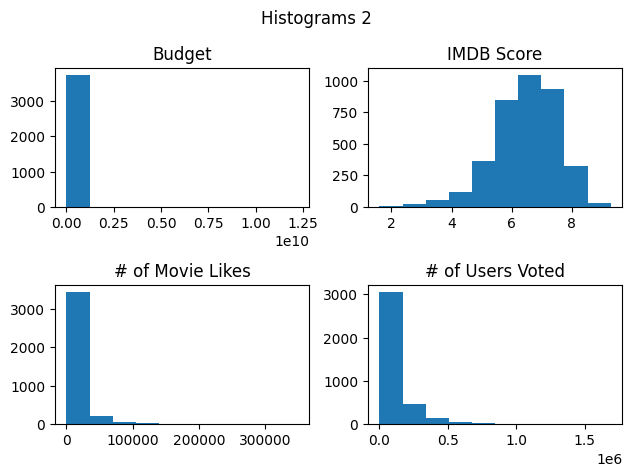

In [ ]:
# Subplots 2:

# Histogram Subplots 2:

hbudget = movies['Budget']
hIMDB = movies['IMDB Score']
hmov_Likes = movies['# Movie Likes']
husers = movies['# Users Voted']

fig, axs = plt.subplots(nrows = 2, ncols = 2)
fig.suptitle('Histograms 2')

#create plots:
axs[0, 0].hist(hbudget)
axs[0, 1].hist(hIMDB)
axs[1, 0].hist(hmov_Likes)
axs[1, 1].hist(husers)

#set title to each subplot:
axs[0, 0].set_title("Budget")
axs[0, 1].set_title("IMDB Score")
axs[1, 0].set_title("# of Movie Likes")
axs[1, 1].set_title("# of Users Voted")

fig.tight_layout(pad = 1.0)

Text(0.5, 0, 'Quantity')

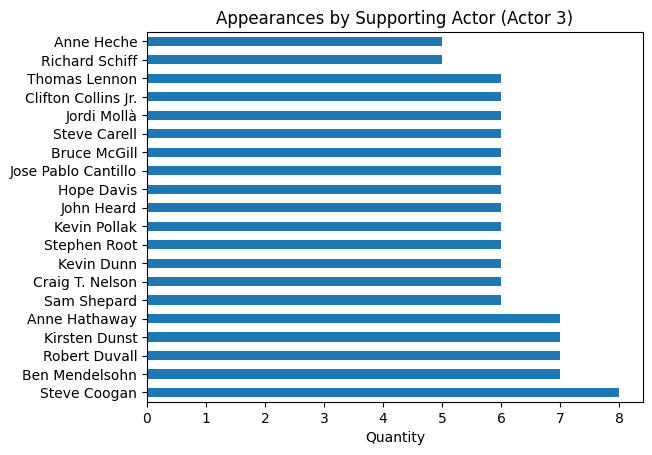

In [ ]:
# Initialize bar plots to visualize categorical features of interest:

import matplotlib.pyplot as plt

# Bar plot showing the number of times the third actor appeared in the dataset for the top 20:
bar_Actor3 = movies['Actor 3 Name'].value_counts()[:20].plot(kind = 'barh')
plt.title("Appearances by Supporting Actor (Actor 3)")
plt.xlabel("Quantity")

<Axes: >

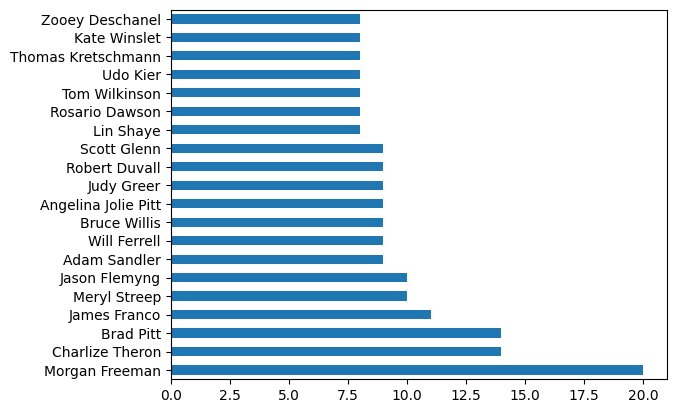

In [ ]:
# Bar plot showing the number of times the second actor appeared in the dataset for the top 20:
bar_Actor2 = movies['Actor 2 Name'].value_counts()[:20].plot(kind = 'barh')
bar_Actor2

<Axes: >

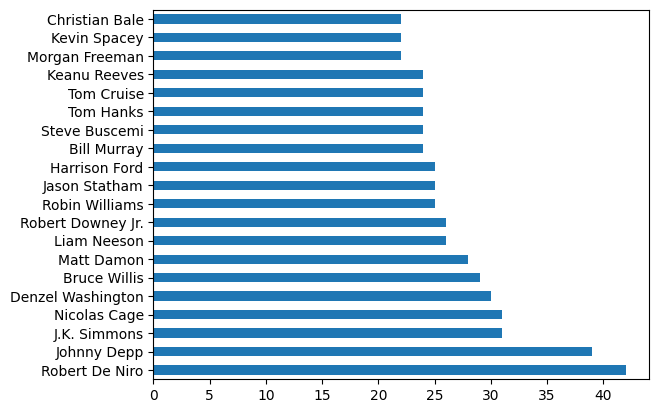

In [ ]:
# Bar plot showing the number of times the first actor appeared in the dataset for the top 20:
bar_Actor1 = movies['Actor 1 Name'].value_counts()[:20].plot(kind = 'barh')
bar_Actor1

<Axes: >

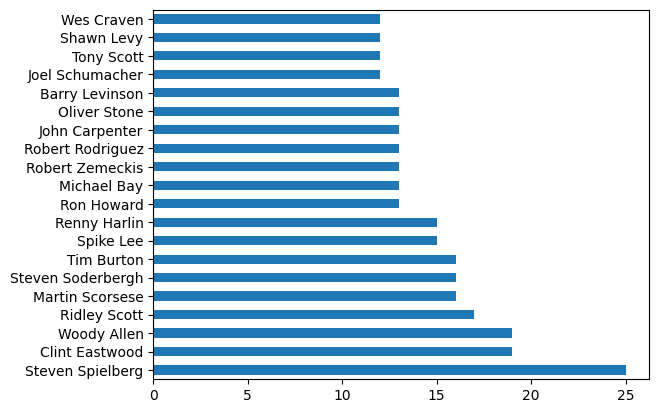

In [ ]:
# Bar plot showing the number of times the director appeared in the dataset for the top 20:
bar_Director = movies['Director Name'].value_counts()[:20].plot(kind = 'barh')
bar_Director

<Axes: >

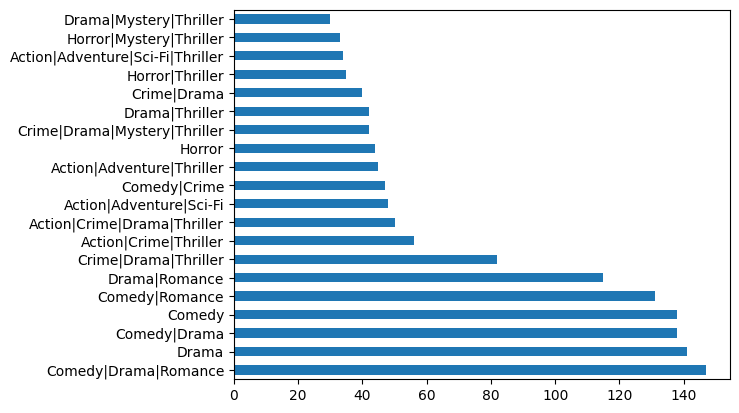

In [ ]:
# Bar plot showing the number of times each genre appeared in the dataset for the top 20:
bar_Genre = movies['Genres'].value_counts()[:20].plot(kind = 'barh')
bar_Genre

<Axes: >

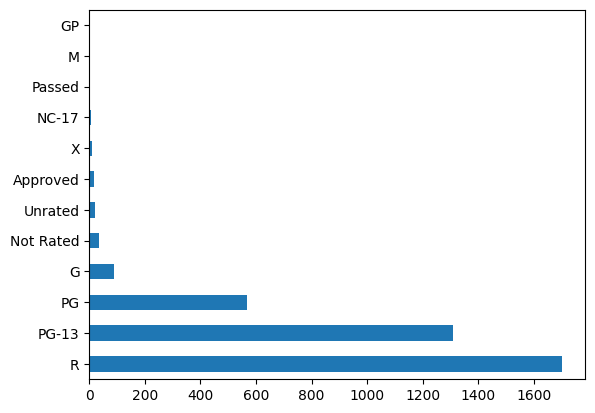

In [ ]:
# Bar plot showing the number of times each content rating appeared in the dataset for the top 20:
bar_Rating = movies['Content Rating'].value_counts()[:20].plot(kind = 'barh')
bar_Rating

Axes(0.125,0.11;0.775x0.77)


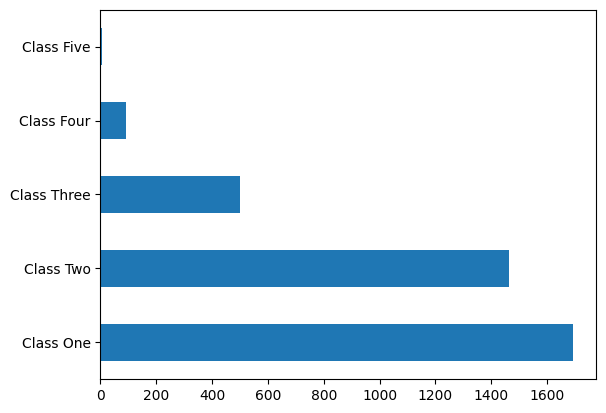

In [ ]:
from pandas.core.groupby.grouper import DataFrame

# Initialize gross revenue classes for our multi- class classification problem. 

'''Revenue Classes:
      $0 - 24.99M
      $25 - 99.99M
      $100 - 249.99M
      $250 - 499.99M
      $500M - 1000000000'''

#Assign each movie to a REVENUE CLASS:
x = pd.cut(movies.Gross, bins = [0, 24999999, 99999999,249999999, 499999999, 1000000000], 
       labels = ['Class One', 'Class Two', 'Class Three', 'Class Four', 'Class Five'])
movies['Classes'] = x

# Now that each movie has been labeled with the corresponding revenue category, count the number of each class that appears in the modified data:
class_Count = movies['Classes'].value_counts()
bar_class_Count = movies['Classes'].value_counts().plot(kind = 'barh')

# Display table and chart showing the relative quantities of each movie class:
print(bar_class_Count)

In [ ]:
class_Count.to_frame()

,Classes
Class One,1692
Class Two,1463
Class Three,502
Class Four,93
Class Five,6


In [ ]:
# Display numerical metrics of interest by various caterogical variables:

# Total gross and mean IMDB score by Content Rating:
cs = content_Sum= movies.groupby(['Content Rating'])['Gross'].sum()
content_IMDB = movies.groupby(['Content Rating'])['IMDB Score'].mean()

# Total gross and mean IMDB score by Genre:
genre_Sum = movies.groupby(['Genres'])['Gross'].sum()
genre_IMDB =  movies.groupby(['Genres'])['IMDB Score'].mean()

cs = content_Sum.to_frame()
ci = content_IMDB.to_frame()
gs = genre_Sum.to_frame()
gi = genre_IMDB.to_frame()

cs['IMDB Score'] = ci
cont_Tab = cs

gs['IMDB Score'] = gi
gen_Tab = gs

gen_Tab.sort_values(by = 'Gross', ascending = False)
cont_Tab.sort_values(by = 'Content Rating', ascending = False)

,Gross,IMDB Score
Content Rating,,
X,186588116.00,6.54
Unrated,133245086.00,6.95
R,54654725975.00,6.64
Passed,33010612.00,7.13
PG-13,90206375077.00,6.27
PG,43781187904.00,6.30
Not Rated,108020991.00,6.97
NC-17,26861222.00,6.37
M,125108900.00,7.45
